# Example. Classification of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


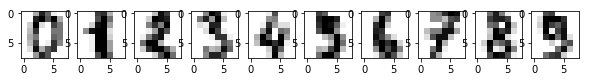

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
n=64 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
P = pca.fit_transform(X) #find principal components

Text(0,0.5,'variance')

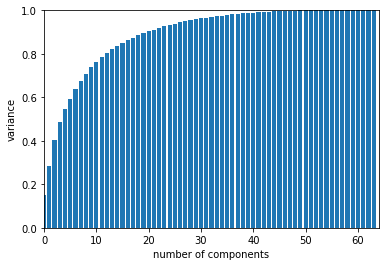

In [6]:
#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
plt.xlim(0,64)
plt.xlabel('number of components')
plt.ylabel('variance')

Perfect Pareto rule: 20% leadning components explain 80% of variance

In [7]:
p=0.8
pca = PCA(p)
P1 = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P1.shape[1],100*p))

we need 13 PCs to explain 80.00 percent of variance


Now use three leading PCs to visualize the digits (different colors stand for different digits)

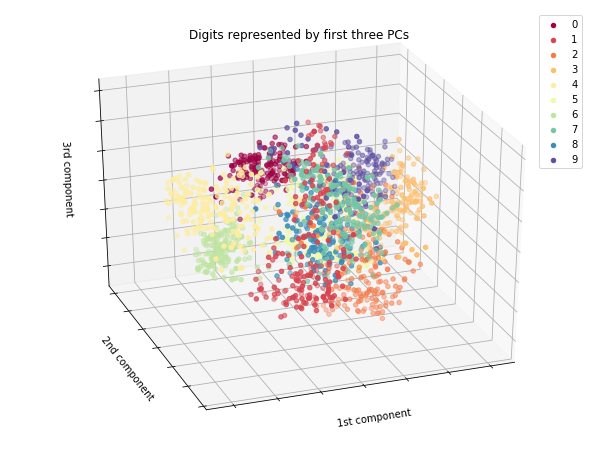

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.Spectral(np.linspace(0, 1, 10))
for d in range(0,10):
    ind=y==d #take only images of a certain digit
    ax.scatter(P[ind, 0], P[ind, 1], P[ind, 2], color=cmap[d,:], label=d)
ax.set_title("Digits represented by first three PCs")
ax.set_xlabel("1st component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd component")
ax.w_zaxis.set_ticklabels([])
ax.legend()

plt.show()

# for d in range(0,4):
#     ind=y==d #take only images of a certain digit
#     plt.scatter(P[ind, 0], P[ind, 1], color=cmap[d,:], label=d)


### Task 1. 
Find examples of pairs of digits which can and can not be clearly distinguished on a 2D plot of first two PCs and/or second and third PCs

# PCA for feature engineering

Another common application of PCA is overcomming multicollinearity and overfitting in regression models

In [9]:
#Upload toy data for linear regression
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


In [10]:
data.shape

(50, 16)

In [11]:
### first run a regular linear regression
import statsmodels.api as sm
Y=np.asarray(data.Y)
X=sm.add_constant(np.asarray(data.iloc[:,1:]))
res=sm.OLS(Y,X).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     12.33
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.20e-09
Time:                        11:32:01   Log-Likelihood:                -53.727
No. Observations:                  50   AIC:                             139.5
Df Residuals:                      34   BIC:                             170.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.2459      2.386     -4.295      0.0

R2 looks quite good. Does it mean the model is successful? 

In [12]:
# perform cross-validation
np.random.seed(0)
from sklearn.linear_model import LinearRegression
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for %d times is %.3f+-%.3f"%(n,np.mean(R_IS),np.std(R_IS)))
print("OS R-squared for %d times is %.3f+-%.3f"%(n,np.mean(R_OS),np.std(R_OS)))

IS R-squared for 100 times is 0.906+-0.040
OS R-squared for 100 times is 0.301+-0.369


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Average OS R2 is much smaller - the model overfits

#### (Over-fitting problem exists once you see an obvious difference between IS and OS R-squared) 

Try selecting only those features which seem statistically significant in terms of p-value

In [13]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [14]:
res=sm.OLS(Y_train,X_train).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     4.595
Date:                Mon, 01 Oct 2018   Prob (F-statistic):             0.0130
Time:                        11:32:01   Log-Likelihood:                -22.729
No. Observations:                  25   AIC:                             77.46
Df Residuals:                       9   BIC:                             96.96
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -14.8375      5.588     -2.655      0.0

In [15]:
# Find the index for variables where pvalues< 0.05
var=np.where(res.pvalues<0.05)[0]
print "pvalues<0.05:", var
res=sm.OLS(Y_train,X_train[:,var]).fit()
print res.summary()

pvalues<0.05: [ 0  1  2  3  4  5  9 12]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     10.30
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           4.84e-05
Time:                        11:32:01   Log-Likelihood:                -29.002
No. Observations:                  25   AIC:                             74.00
Df Residuals:                      17   BIC:                             83.76
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       

But even significant features still fail to perform over the test set

In [16]:
res=LinearRegression(fit_intercept=False)
res.fit(X_train,Y_train)
Ypred=res.predict(X_test)
R_OS=1-((np.asarray(Ypred)-Y_test)**2).sum()/((Y_test-np.mean(Y_test))**2).sum()
print("OS R-squared=%.3f"%R_OS)

OS R-squared=0.276


Try PCA - learn a few leading principle components and see if they will perform better in the regression

[  5.44492429e-01   1.72713156e-01   1.35283837e-01   3.84516212e-02
   2.71905102e-02   2.36736510e-02   1.45061674e-02   1.30711510e-02
   1.03455619e-02   9.23160303e-03   4.59450142e-03   3.58893845e-03
   1.66600294e-03   1.19081376e-03   5.58960629e-08]


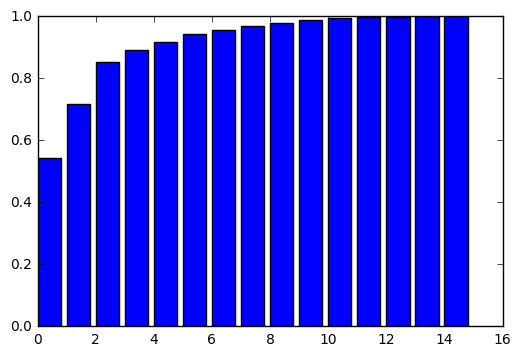

In [17]:
#Question D
n=15 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Ptrain = pca.fit_transform(X_train)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues.cumsum()/sum(eigenvalues));

In [18]:
#first run regression on all the PCs
res=sm.OLS(Y_train,Ptrain).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     4.443
Date:                Mon, 01 Oct 2018   Prob (F-statistic):             0.0110
Time:                        11:32:01   Log-Likelihood:                -24.465
No. Observations:                  25   AIC:                             78.93
Df Residuals:                      10   BIC:                             97.21
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0038      0.006     -0.674      0.5

In [19]:
#now run with only first 5 components
res=sm.OLS(Y_train,Ptrain[:,0:5]).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     3.307
Date:                Mon, 01 Oct 2018   Prob (F-statistic):             0.0245
Time:                        11:32:01   Log-Likelihood:                -42.392
No. Observations:                  25   AIC:                             94.78
Df Residuals:                      20   BIC:                             100.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0038      0.008     -0.466      0.6

In [20]:
#test out-of-sample performance
res=LinearRegression(fit_intercept=False)
res.fit(Ptrain[:,0:5],Y_train)
#res=sm.OLS(y_train,Xproj_tr).fit()
P_test=pca.transform(X_test)
Ypred=res.predict(P_test[:,0:5])
R_OS=1-((np.asarray(Ypred)-Y_test)**2).sum()/((Y_test-np.mean(Y_test))**2).sum()
print("OS R-squared=%.3f"%R_OS)

OS R-squared=0.584


In [21]:
#As features are now uncorrelated - more happen to have better p-value
# Also the impact of those features does not change during feature selection (unlike the original case)
res=sm.OLS(Y_train,Ptrain).fit()
var=np.where(res.pvalues<0.05)[0]
print "pvalues<0.05:", var
res=sm.OLS(Y_train,Ptrain[:,var]).fit()
print res.summary()

pvalues<0.05: [ 1  2  3 10 11 14]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     6.542
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           0.000717
Time:                        11:32:02   Log-Likelihood:                -35.919
No. Observations:                  25   AIC:                             83.84
Df Residuals:                      19   BIC:                             91.15
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0

In [22]:
# Perform cross-validation
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    # Split data here
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    ########################################################################################
    # In sample:
    # Run PCA on X_train, y_train.
    pca = PCA(15)
    Xproj_tr = pca.fit_transform(X_train)
    
    # Do OLS and feature selection by pvalues<0.05
    res=sm.OLS(y_train,Xproj_tr).fit()
    
    # Do feature selection and run res again
    res1=sm.OLS(y_train,Xproj_tr[:,0:3]).fit()
    #res1=sm.OLS(y_train,Xproj_tr[:,np.where(res.pvalues<0.05)[0]]).fit()
    # This is the training process, we did not use any information from the testing set.
    R_IS.append(res1.rsquared)
    #########################################################################################
    # Out of sample.
    Xproj_te=pca.transform(X_test)  #Don't use fit_transform. 
    #res2=sm.OLS(y_test,Xproj_te[:,np.where(res.pvalues<0.05)[0]]).fit()
    res2=sm.OLS(y_test,Xproj_te[:,0:3]).fit()
    R_OS.append(res2.rsquared)

print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 100 times is 0.460430154173
OS R-squared for 100 times is 0.522119173995


# Limitations: when PCA fails

PCA can only remove linear correlations in the data and help to reveal distinctions in linearly separable data. Non-linear relations might not be addressed

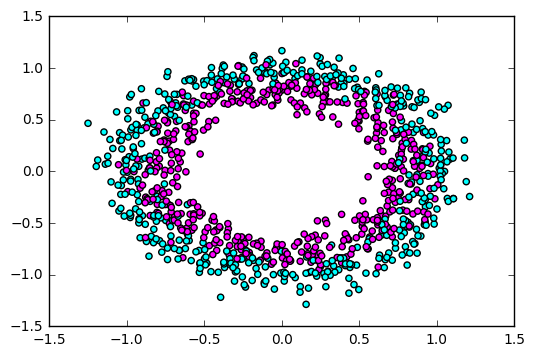

In [23]:
#generate and plot the data
from sklearn import datasets
X2,y2=datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1)
plt.scatter(X2[:,0],X2[:,1], c=y2, cmap=plt.cm.cool)
plt.show()

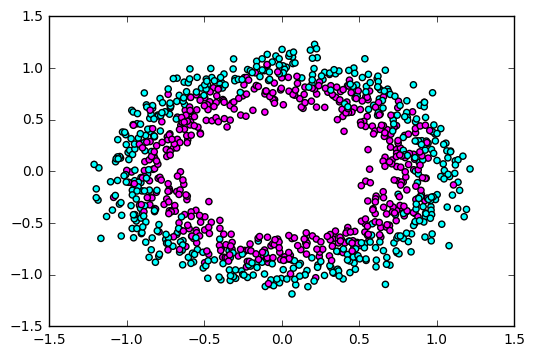

In [24]:
#transform the data using PCA; plot
clf = PCA(2) 
X_trans = clf.fit_transform(X2)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y2, cmap=plt.cm.cool)

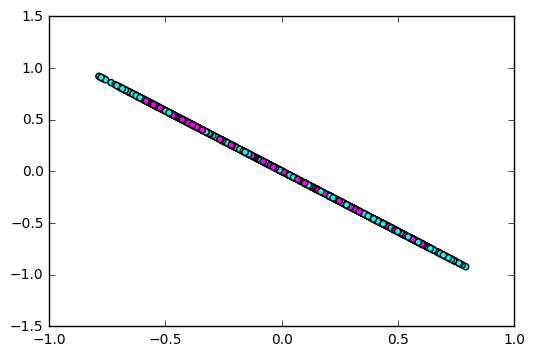

In [25]:
#plot the data along the first eigenvector
clf = PCA(1) 
X_trans = clf.fit_transform(X2)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.scatter(X_new[:, 0], X_new[:, 1], c=y2, cmap=plt.cm.cool)
plt.show()

No distrinction could be found among projections on the first eigenvector (first PC), even though original 2D data could be geometrically distringuished